<a href="https://colab.research.google.com/github/maryawamaitha/MaryaData_Science-Projects-Portfolio/blob/main/DivorcePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions are ranked on a scale of 1-5 with 1 being the lowest and 5 being the highest. The last category states if the couple has divorced.

1.	If one of us apologizes when our discussion deteriorates, the discussion ends.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my spouse from the beginning and correct it.
4.	When I discuss with my spouse, to contact him will eventually work.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	Most of our goals are common to my spouse.
11.	I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12.	My spouse and I have similar values in terms of personal freedom.
13.	My spouse and I have similar sense of entertainment.
14.	Most of our goals for people (children, friends, etc.) are the same.
15.	Our dreams with my spouse are similar and harmonious.
16.	We're compatible with my spouse about what love should be.
17.	We share the same views about being happy in our life with my spouse
18.	My spouse and I have similar ideas about how marriage should be
19.	My spouse and I have similar ideas about how roles should be in marriage
20.	My spouse and I have similar values in trust.
21.	I know exactly what my wife likes.
22.	I know how my spouse wants to be taken care of when she/he sick.
23.	I know my spouse's favorite food.
24.	I can tell you what kind of stress my spouse is facing in her/his life.
25.	I have knowledge of my spouse's inner world.
26.	I know my spouse's basic anxieties.
27.	I know what my spouse's current sources of stress are.
28.	I know my spouse's hopes and wishes.
29.	I know my spouse very well.
30.	I know my spouse's friends and their social relationships.
31.	I feel aggressive when I argue with my spouse.
32.	When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33.	I can use negative statements about my spouse's personality during our discussions.
34.	I can use offensive expressions during our discussions.
35.	I can insult my spouse during our discussions.
36.	I can be humiliating when we discussions.
37.	My discussion with my spouse is not calm.
38.	I hate my spouse's way of open a subject.
39.	Our discussions often occur suddenly.
40.	We're just starting a discussion before I know what's going on.
41.	When I talk to my spouse about something, my calm suddenly breaks.
42.	When I argue with my spouse, ı only go out and I don't say a word.
43.	I mostly stay silent to calm the environment a little bit.
44.	Sometimes I think it's good for me to leave home for a while.
45.	I'd rather stay silent than discuss with my spouse.
46.	Even if I'm right in the discussion, I stay silent to hurt my spouse.
47.	When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48.	I feel right in our discussions.
49.	I have nothing to do with what I've been accused of.
50.	I'm not actually the one who's guilty about what I'm accused of.
51.	I'm not the one who's wrong about problems at home.
52.	I wouldn't hesitate to tell my spouse about her/his inadequacy.
53.	When I discuss, I remind my spouse of her/his inadequacy.
54.	I'm not afraid to tell my spouse about her/his incompetence.
55. 	Divorce Y/N


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer, make_column_selector
# from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('/content/divorce.csv')
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
df.duplicated().sum()

20

In [4]:
df.drop_duplicates(inplace=True)

#Splitting the Data

In [9]:
X=df.drop(columns=['Divorce_Y_N'])
y=df['Divorce_Y_N']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

#Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="entropy")
scaler=StandardScaler()
dec_tree_pipe=make_pipeline(scaler,dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [26]:
predictions = dec_tree_pipe.predict(X_test)

In [27]:
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))
  
  fig, ax = plt.subplots(ncols=3, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes,
                                        ax=ax[0])
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  
  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  curve.ax_.grid()
  curve.ax_.plot([0, 1], [0, 1], ls=':')

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        20

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


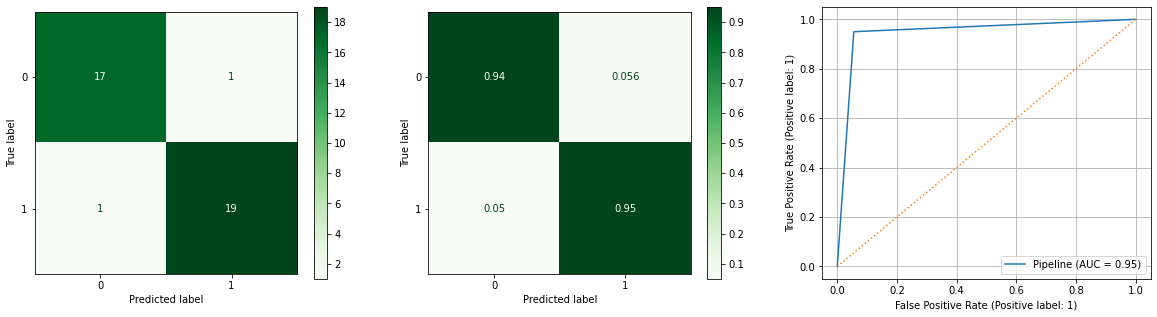

In [28]:
evaluate_classification(dec_tree_pipe,X_test,y_test)

#Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_pipe=make_pipeline(scaler,logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [52]:
preds = logreg_pipe.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        20

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


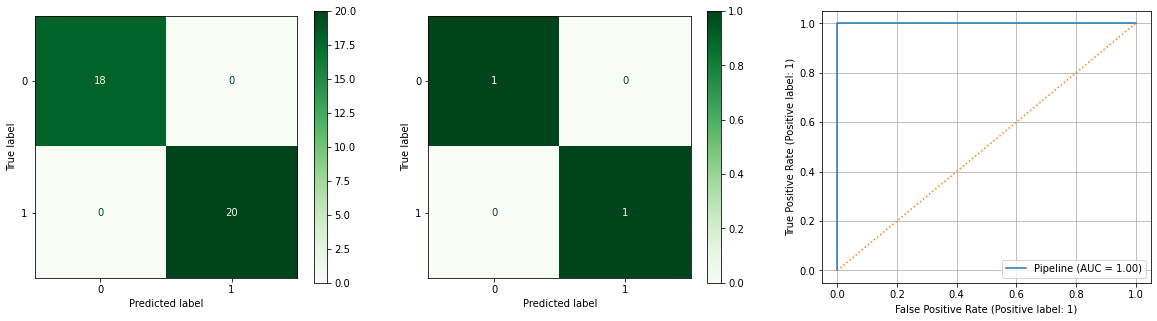

In [53]:
evaluate_classification(logreg_pipe, X_test, y_test)